### Imports & Definitions

In [15]:
import sys
sys.path.append("../../utils")
from definitions import *
from parsing_helpers import get_num_diplomas
from huggingface_helpers import get_tokenizer, get_model, get_num_tokens

In [16]:
years = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016]

### Read data

In [22]:
spbu_diplomas_dataset_path = ARTIFACTS_DIR_PATH.joinpath("parsing/diplomas/spbu/dataset.csv")
df = pd.read_csv(spbu_diplomas_dataset_path)
df.head()

,id,year,diploma,abstract,study_field,degree,original_diploma_extension
0,40165,2023,St. Petersburg State University\nGraduate Scho...,Данная работа исследует потенциал использовани...,MANAGEMENT,MASTER'S STUDIES,.docx
1,41453,2023,Санкт-Петербургский государственный университе...,Абдуллаев Ш.У. тема диссертации: «Роль политик...,INTERNATIONAL RELATIONS,MASTER'S STUDIES,.doc
2,43790,2023,Санкт-Петербургский государственный университе...,Выпускная квалификационная работа посвящена из...,POLITICAL SCIENCE,BACHELOR STUDIES,.docx
3,41165,2023,Санкт-Петербургский государственный университе...,В данной работе описывается реализация обобщен...,MATHEMATICS AND MECHANICS,BACHELOR STUDIES,.pdf
4,42349,2023,ПРАВИТЕЛЬСТВО РОССИЙСКОЙ ФЕДЕРАЦИИ \nСАНКТ-ПЕТ...,В выпускной квалификационной работе раскрывает...,SOCIOLOGY,BACHELOR STUDIES,.docx


In [28]:
len(df)

12945

In [23]:
spbu_russian_diplomas_dataset_path = ARTIFACTS_DIR_PATH.joinpath("parsing/diplomas/spbu/russian_dataset.csv")
russian_df = pd.read_csv(spbu_russian_diplomas_dataset_path)
russian_df.head()

,id,year,diploma,abstract,study_field,degree,original_diploma_extension
0,41453,2023,Санкт-Петербургский государственный университе...,Абдуллаев Ш.У. тема диссертации: «Роль политик...,INTERNATIONAL RELATIONS,MASTER'S STUDIES,.doc
1,43790,2023,Санкт-Петербургский государственный университе...,Выпускная квалификационная работа посвящена из...,POLITICAL SCIENCE,BACHELOR STUDIES,.docx
2,41165,2023,Санкт-Петербургский государственный университе...,В данной работе описывается реализация обобщен...,MATHEMATICS AND MECHANICS,BACHELOR STUDIES,.pdf
3,42349,2023,ПРАВИТЕЛЬСТВО РОССИЙСКОЙ ФЕДЕРАЦИИ \nСАНКТ-ПЕТ...,В выпускной квалификационной работе раскрывает...,SOCIOLOGY,BACHELOR STUDIES,.docx
4,40166,2023,Федеральное государственное бюджетное образова...,На сегодняшний день наблюдается высокий спрос ...,MANAGEMENT,BACHELOR STUDIES,.docx


In [30]:
len(russian_df)

10291

### View some statistics

In [18]:
base_diplomas_spbu_dir_path = ARTIFACTS_DIR_PATH.joinpath("parsing/diplomas/spbu/")
new_rows = []
num_diplomas = dict()
len_ids = dict()
len_skipped_ids = dict()
for year in tqdm(years, desc="Years..."):
    ids_path = base_diplomas_spbu_dir_path.joinpath(f"{year}/ids.json")
    skipped_ids_path = base_diplomas_spbu_dir_path.joinpath(f"{year}/skipped_ids.jsons")
    with open(ids_path, "r") as f:
        ids = json.load(f)
    with open(skipped_ids_path, "r") as f:
        skipped_ids = [json.loads(x)["id"] for x in f.readlines()] 
    len_ids[year] = len(ids)
    len_skipped_ids[year] = len(skipped_ids)
    num_diplomas[year] = get_num_diplomas(year)

Years...:   0%|          | 0/8 [00:00<?, ?it/s]

In [20]:
len_skipped_only_no_view_ids = dict()
for year in tqdm(years, desc="Years..."):
    ids_path = base_diplomas_spbu_dir_path.joinpath(f"{year}/ids.json")
    skipped_ids_path = base_diplomas_spbu_dir_path.joinpath(f"{year}/skipped_ids.jsons")
    skipped_only_no_veiw_ids = []
    with open(skipped_ids_path, "r") as f:
        for x in f.readlines():
            entry = json.loads(x)
            if entry["reason"] == "no work view":
                skipped_only_no_veiw_ids.append(entry["id"])
    len_skipped_only_no_view_ids[year] = len(skipped_only_no_veiw_ids)

Years...:   0%|          | 0/8 [00:00<?, ?it/s]

In [24]:
df_rows = dict()
russian_df_rows = dict()
for year in tqdm(years, desc="Years..."):
    df_rows[year] = len(df[df["year"] == year])
    russian_df_rows[year] = len(russian_df[russian_df["year"] == year])
    not_skipped_only_no_view = len_ids[year] - len_skipped_only_no_view_ids[year]
    not_skipped_docs = len_ids[year] - len_skipped_ids[year]
    print(year, num_diplomas[year], len_ids[year], not_skipped_only_no_view, not_skipped_docs, df_rows[year], russian_df_rows[year])

Years...:   0%|          | 0/8 [00:00<?, ?it/s]

2023 2328 2128 1660 1654 1470 1271
2022 2139 2139 1783 1783 1603 1397
2021 1857 1857 1857 1853 1703 1459
2020 1185 1185 1185 1183 1109 943
2019 1035 1035 1035 1033 963 790
2018 2730 2730 2697 2689 2479 1997
2017 3369 3369 3268 3248 2342 1571
2016 2494 1594 1416 1416 1276 863


Years...:   0%|          | 0/8 [00:00<?, ?it/s]

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

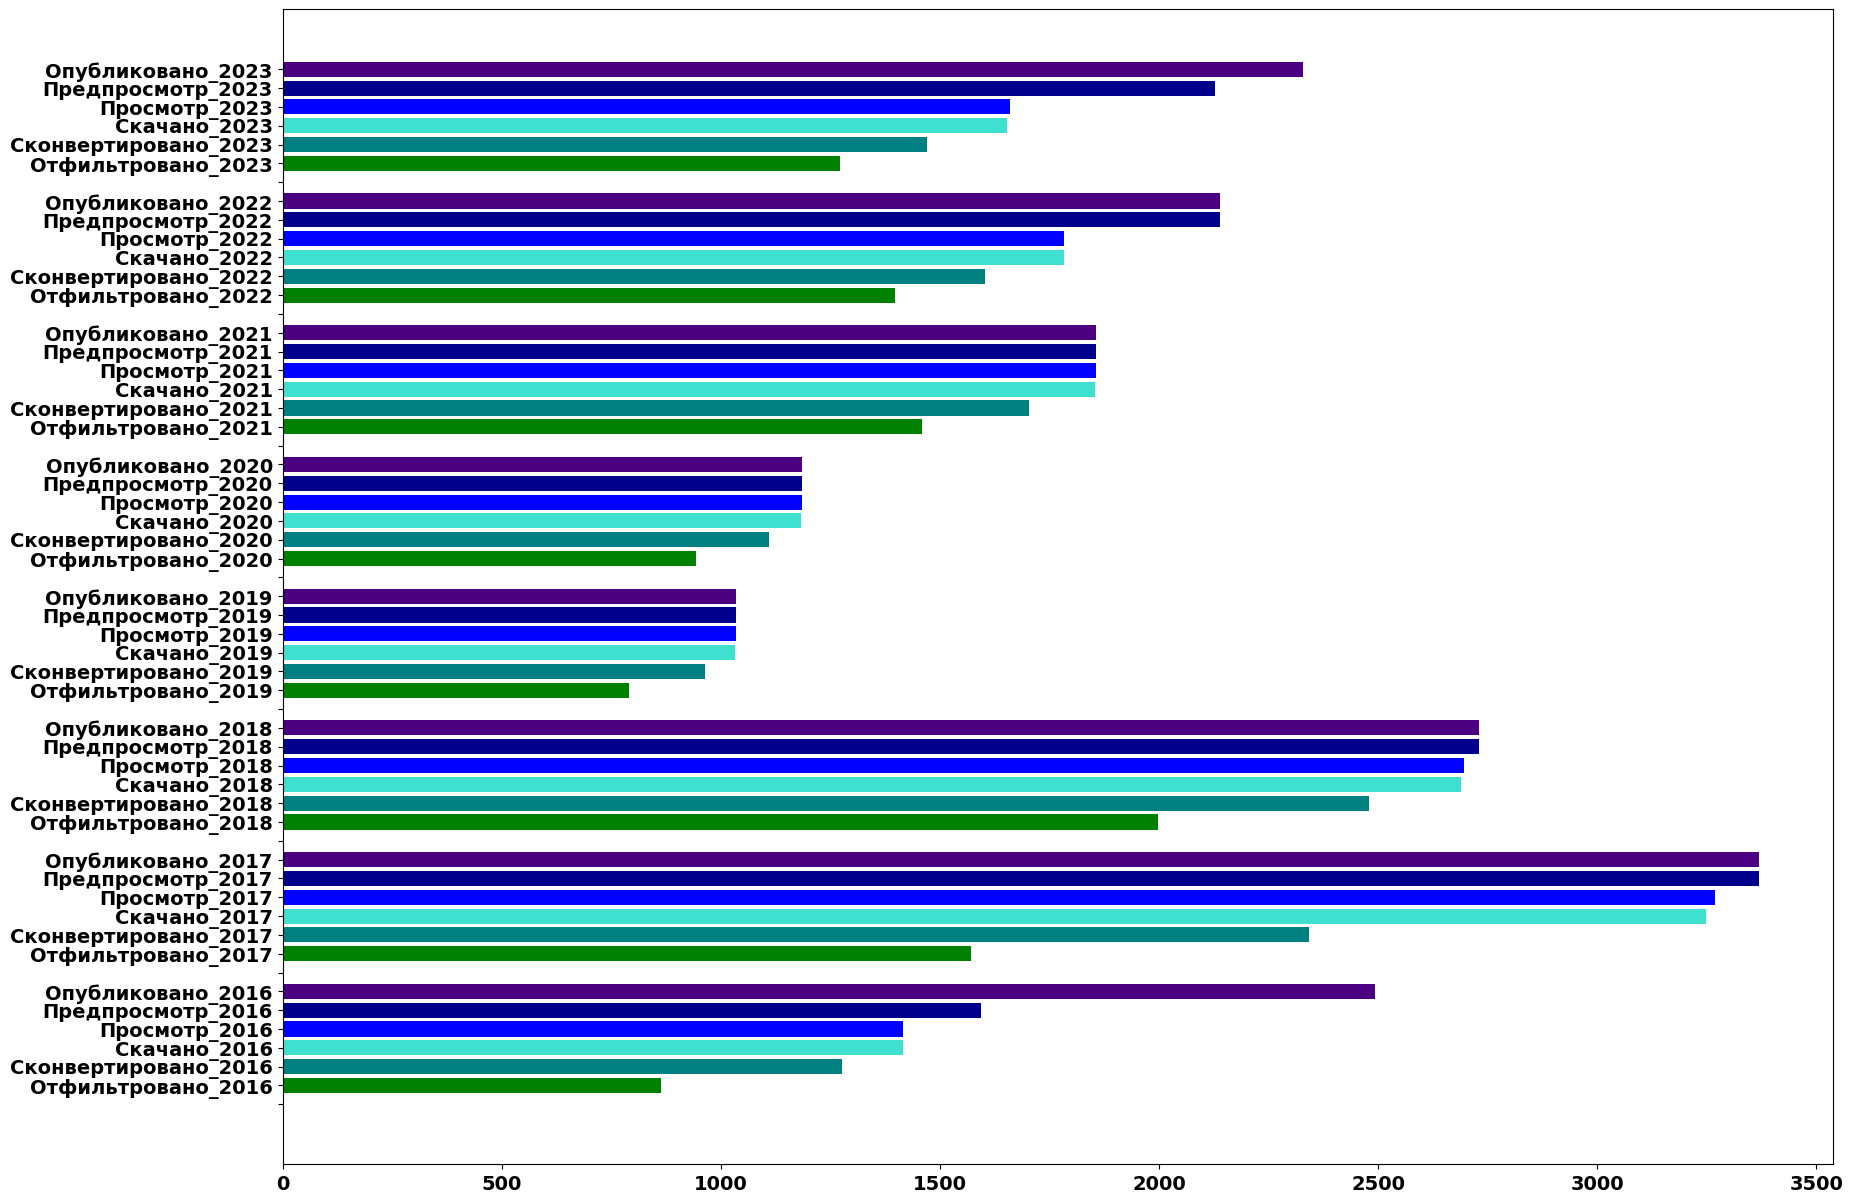

In [50]:

font = {
    # 'family' : 'normal',
    'weight' : 'bold',
    'size'   : 14
}

import matplotlib
matplotlib.rc('font', **font)

x_all = []
h_all = []
colors_all = []
for year in tqdm(reversed(years), total=len(years), desc="Years..."):
    h = np.array([num_diplomas[year], len_ids[year], len_ids[year] - len_skipped_only_no_view_ids[year], len_ids[year] - len_skipped_ids[year], df_rows[year], russian_df_rows[year], 0])
    x = [f"Опубликовано_{year}", f"Предпросмотр_{year}", f"Просмотр_{year}", f"Скачано_{year}", f"Сконвертировано_{year}", f"Отфильтровано_{year}", " " * (year % 10)]
    # colors = ["green", "blue", "orange", "gray", "violet", "purple", "red"]
    colors = ["indigo", "darkblue", "blue", "turquoise", "teal", "green", "black"]
    h_all.extend(reversed(h))
    x_all.extend(reversed(x))
    colors_all.extend(reversed(colors))
plt.figure(figsize=(20, 15))
plt.barh(x_all, h_all, height=0.8, color=colors_all)


plt.show()

<BarContainer object of 56 artists>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

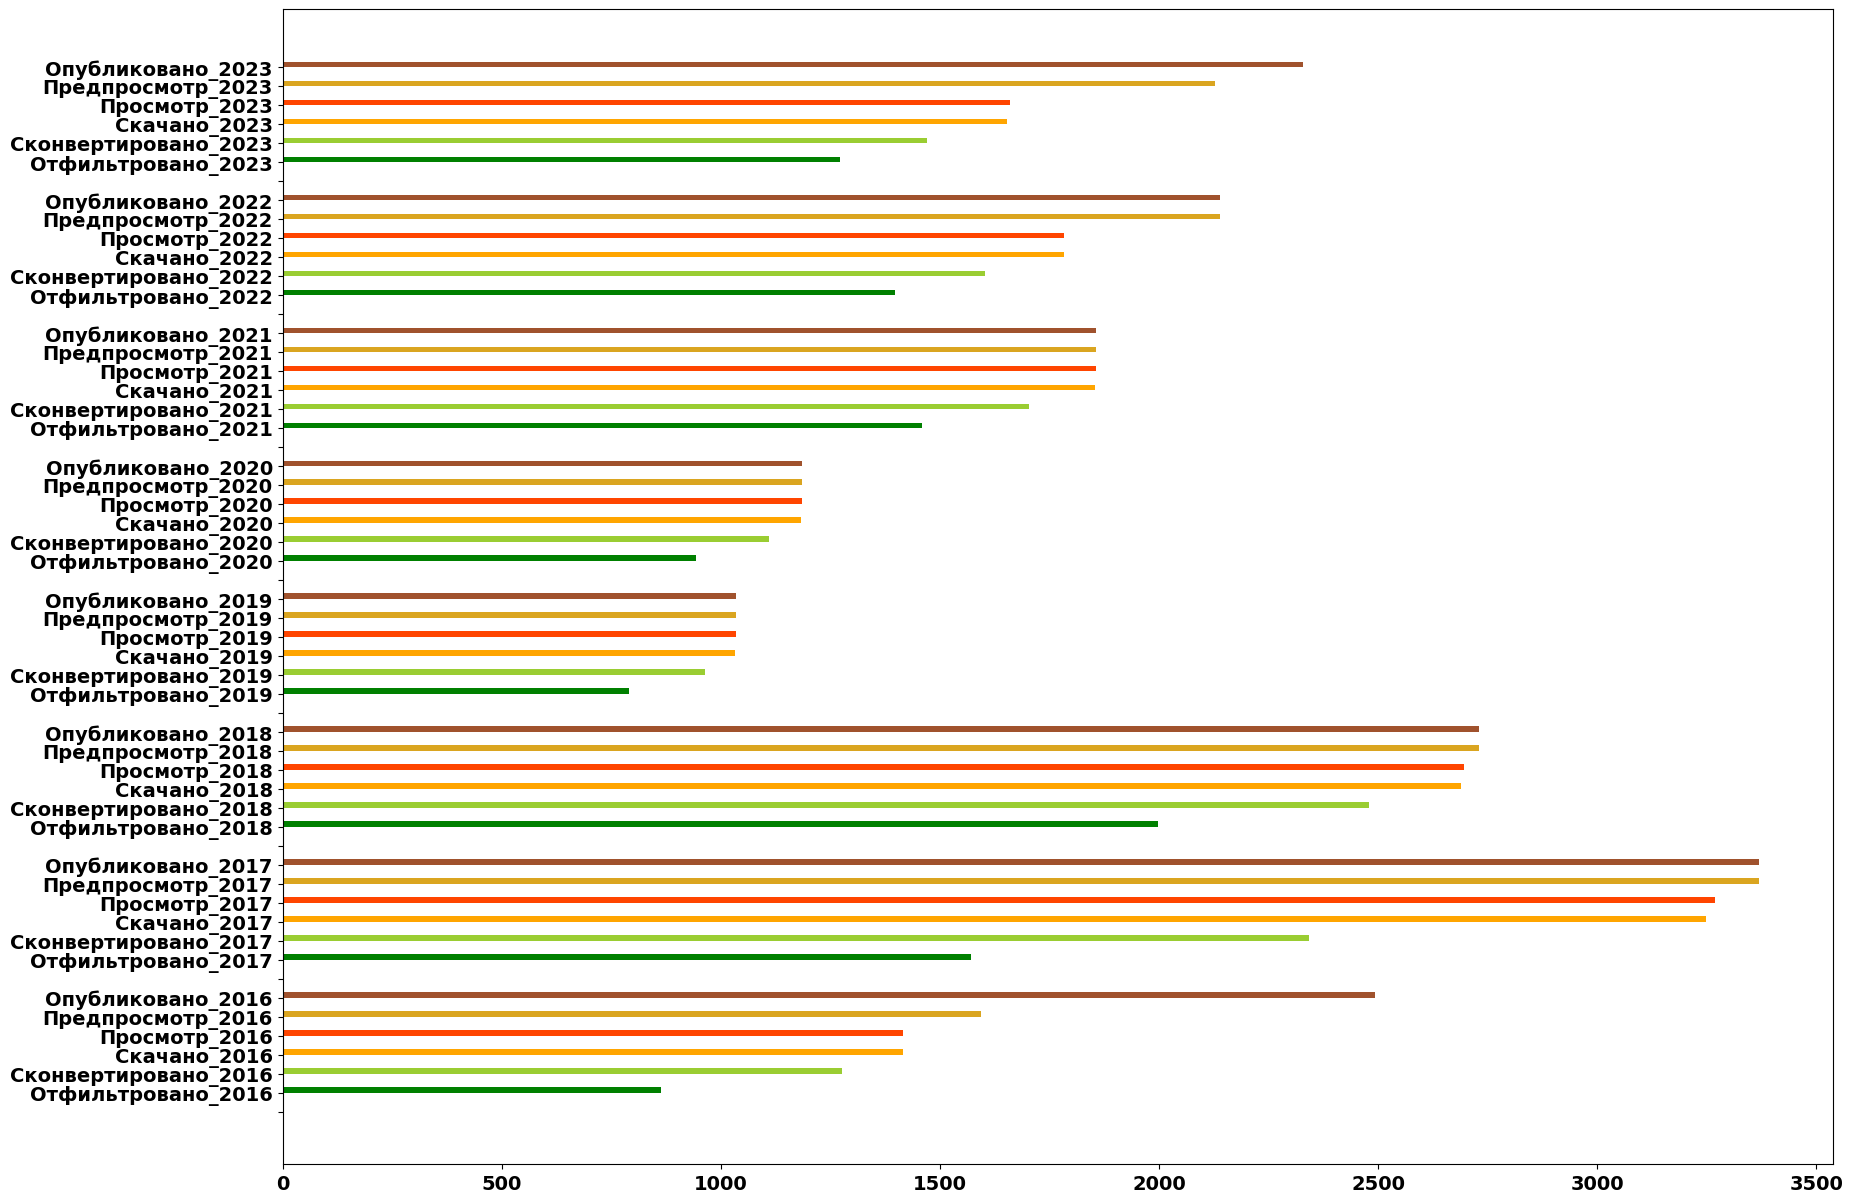

In [43]:

plt.figure(figsize=(20, 15))
plt.barh(x_all, h_all, height=0.8, align='edge', color=colors_all)

Years...:   0%|          | 0/8 [00:00<?, ?it/s]

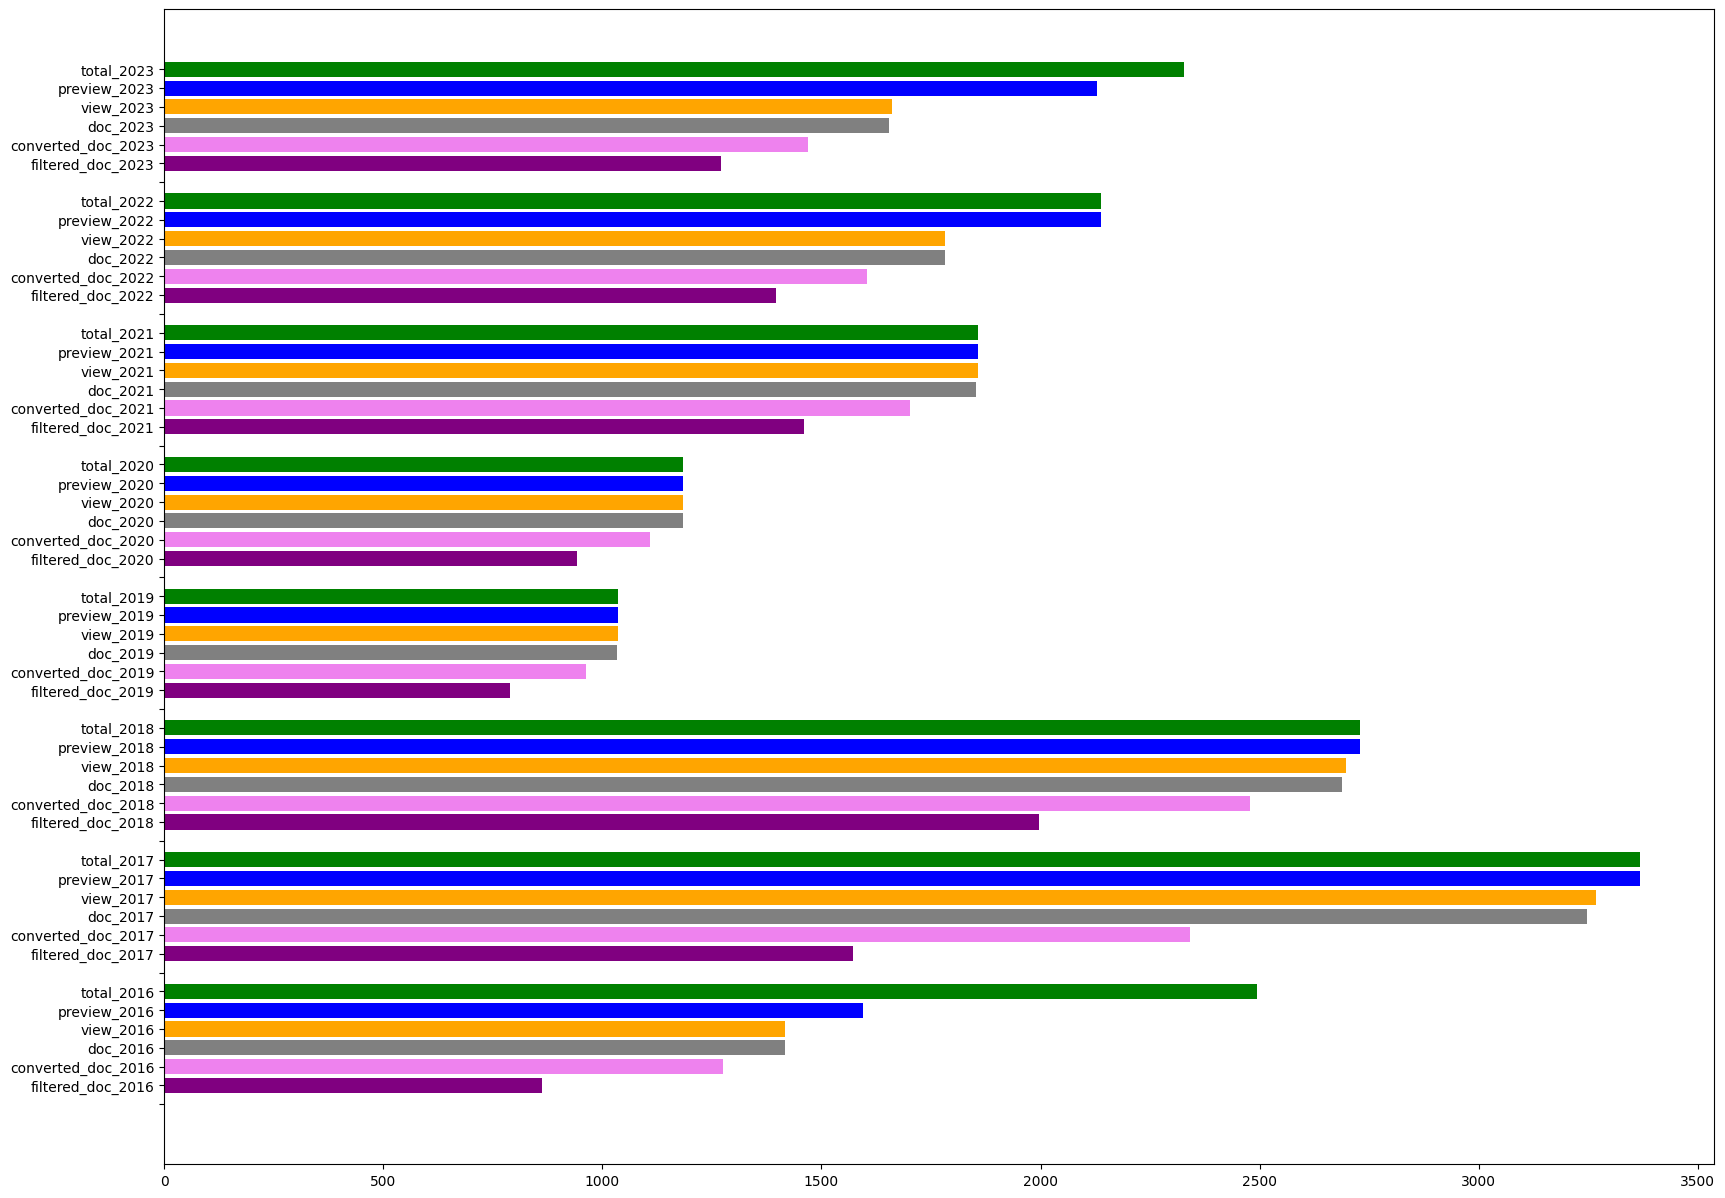

In [34]:
x_all = []
h_all = []
colors_all = []
for year in tqdm(reversed(years), total=len(years), desc="Years..."):
    h = np.array([num_diplomas[year], len_ids[year], len_ids[year] - len_skipped_only_no_view_ids[year], len_ids[year] - len_skipped_ids[year], df_rows[year], russian_df_rows[year], 0])
    x = [f"total_{year}", f"preview_{year}", f"view_{year}", f"doc_{year}", f"converted_doc_{year}", f"filtered_doc_{year}", " " * (year % 10)]
    colors = ["green", "blue", "orange", "gray", "violet", "purple", "red"]
    h_all.extend(reversed(h))
    x_all.extend(reversed(x))
    colors_all.extend(reversed(colors))
plt.figure(figsize=(20, 15))
plt.barh(x_all, h_all, height=0.8, color=colors_all)
plt.show()

In [54]:
len(df)

14398

### Apply tokenizers

In [4]:
model_to_repo = copy.deepcopy(HUGGINGFACE_MODEL_TO_REPO)
model_to_repo.pop(YALM_100B)
model_to_repo.pop(RUGPT3_XL)
model_to_repo

{'llama-2-7b': 'meta-llama/Llama-2-7b-hf',
 'falcon-7b': 'tiiuae/falcon-7b',
 'bloom': 'bigscience/bloom',
 'flan-t5-xxl': 'google/flan-t5-xxl',
 'fred-t5-1.7b': 'ai-forever/FRED-T5-1.7B',
 'phi': 'microsoft/phi-2',
 'dolly-v2-7b': 'databricks/dolly-v2-7b',
 'DeciLM-7b': 'Deci/DeciLM-7B',
 'saiga_mistral_7b_lora': 'IlyaGusev/saiga_mistral_7b_lora',
 'vicuna-7b': 'lmsys/vicuna-7b-v1.5',
 'vikhr-7b': 'Vikhrmodels/Vikhr-7b-0.1',
 'ru-longformer-large-4096': 'kazzand/ru-longformer-large-4096',
 'mistral-7b': 'mistralai/Mistral-7B-v0.1',
 'mixtral-8x7b': 'mistralai/Mixtral-8x7B-v0.1',
 'gemma-7b': 'google/gemma-7b',
 'ruT5-large': 'ai-forever/ruT5-large',
 'ruBert-large': 'ai-forever/ruBert-large',
 'ruRoberta-large': 'ai-forever/ruRoberta-large',
 'ruElectra-large': 'ai-forever/ruElectra-large',
 'mt5-xxl': 'google/mt5-xxl',
 'ru-e5-base': 'hivaze/ru-e5-base'}

In [5]:
debug=True
output_dir_path = ARTIFACTS_DIR_PATH.joinpath("tokens/full_russian_diplomas_stupid_filter/")
output_dir_path.mkdir(exist_ok=True, parents=True)
output_dir_path_abstract = ARTIFACTS_DIR_PATH.joinpath("tokens/full_russian_diplomas_stupid_filter_abstract/")
output_dir_path_abstract.mkdir(exist_ok=True, parents=True)
failed = []
for model, repo in tqdm(model_to_repo.items(), desc="Iterating through models"):
    try:
        tokenizer = get_tokenizer(model, repo)
        id_to_tokens = dict()
        id_to_tokens_abstract = dict()
        for _, row in tqdm(russian_df.iterrows(), total=len(russian_df), desc="rows..."):
            id_to_tokens[row["id"]] = get_num_tokens(tokenizer, row["diploma"])
            id_to_tokens_abstract[row["id"]] = get_num_tokens(tokenizer, row["abstract"])
        with open(output_dir_path.joinpath(f"{model}.json"), "w") as f:
            json.dump(id_to_tokens, f, indent=2, ensure_ascii=False)
        with open(output_dir_path_abstract.joinpath(f"{model}.json"), "w") as f:
            json.dump(id_to_tokens_abstract, f, indent=2, ensure_ascii=False)
    except Exception as e:
        if debug:
            print(f"failed {model} with exception {e}")
        failed.append(model)
if failed:
    print(f"Failed: {failed}.\nCheck that you logged in to hugginface and have permissions for those models.")
else:
    print("All ok")

Iterating through models:   0%|          | 0/21 [00:00<?, ?it/s]

/Users/nvdenisov2002/study/8-semester/diploma/.conda/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (171428 > 2048). Running this sequence through the model will result in indexing errors


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (146942 > 512). Running this sequence through the model will result in indexing errors
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (186741 > 2048). Running this sequence through the model will result in indexing errors
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (81428 > 32768). Running this sequence through the model will result in indexing errors


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (75472 > 4096). Running this sequence through the model will result in indexing errors


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (64166 > 4096). Running this sequence through the model will result in indexing errors


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (55125 > 512). Running this sequence through the model will result in indexing errors
/Users/nvdenisov2002/study/8-semester/diploma/.conda/lib/python3.11/site-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

rows...:   0%|          | 0/10924 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (60434 > 512). Running this sequence through the model will result in indexing errors


All ok


In [20]:
for file in output_dir_path.glob("*.json"):
    with open(file, "r") as f:
        tokens = json.load(f)
    values = list(tokens.values())
    print(values)
    i = np.argmin(values)
    ids = list(tokens.keys())
    print(ids[i])
    break

[59386, 25862, 19404, 42306, 66335, 71284, 43745, 34089, 25938, 22140, 51769, 41736, 27049, 10661, 34379, 16413, 95068, 19554, 27975, 88005, 39408, 23803, 32643, 34369, 35694, 25566, 7601, 28977, 44709, 19412, 36740, 48183, 59601, 30806, 21169, 61339, 73407, 49893, 14962, 58203, 25764, 38519, 47072, 9350, 51482, 41376, 46859, 26685, 36559, 46865, 28209, 46133, 29473, 37352, 53787, 60611, 27223, 44647, 45596, 19370, 66050, 95081, 34531, 8595, 15059, 17594, 45445, 26497, 39265, 49773, 101154, 43557, 42992, 60201, 23986, 31398, 21971, 49748, 55258, 12456, 31049, 15139, 32303, 58866, 70998, 30789, 83517, 60237, 39203, 36561, 34916, 49251, 30554, 45556, 68964, 54376, 28574, 27564, 15406, 64744, 35391, 23582, 33037, 42912, 23329, 9102, 23288, 32856, 51789, 13417, 8896, 31275, 24359, 43760, 18768, 38628, 51278, 32149, 35897, 51248, 38090, 41949, 47135, 40316, 53534, 41423, 29230, 59734, 5517, 24262, 42877, 39485, 59951, 32142, 23387, 19922, 24823, 50508, 37661, 16672, 31213, 30627, 45212, 437

### Plot smth

In [2]:
output_dir_path = ARTIFACTS_DIR_PATH.joinpath("tokens/full_russian_diplomas_2023_stupid_filter/")

In [3]:
from matplotlib_helpers import plot_tokens_distributions

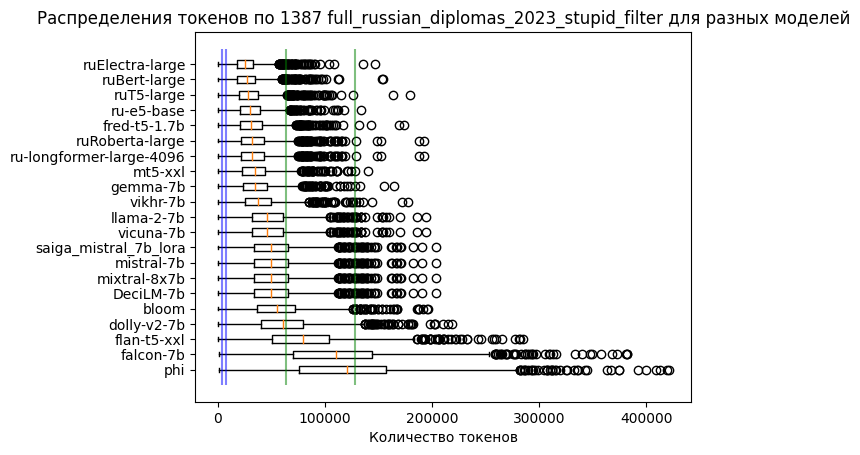

In [4]:
plot_tokens_distributions(output_dir_path, vlines_blue=[4000, 8000], vlines_green=[64000, 128000])

In [5]:
output_dir_path = ARTIFACTS_DIR_PATH.joinpath("tokens/books/")

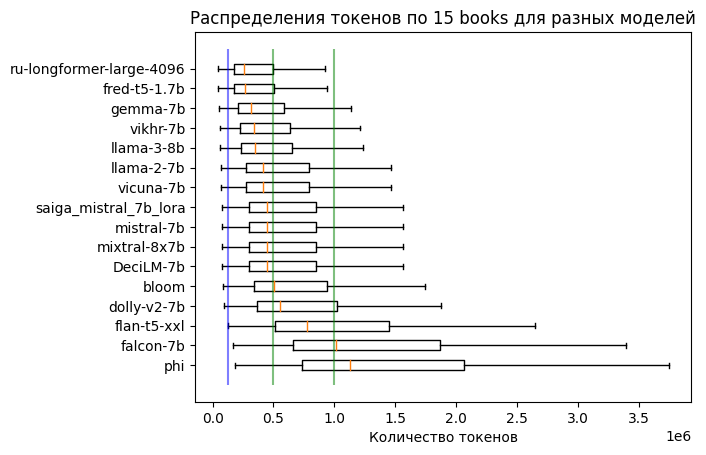

In [8]:
plot_tokens_distributions(output_dir_path, vlines_blue=[128000], vlines_green=[500000, 1000000])

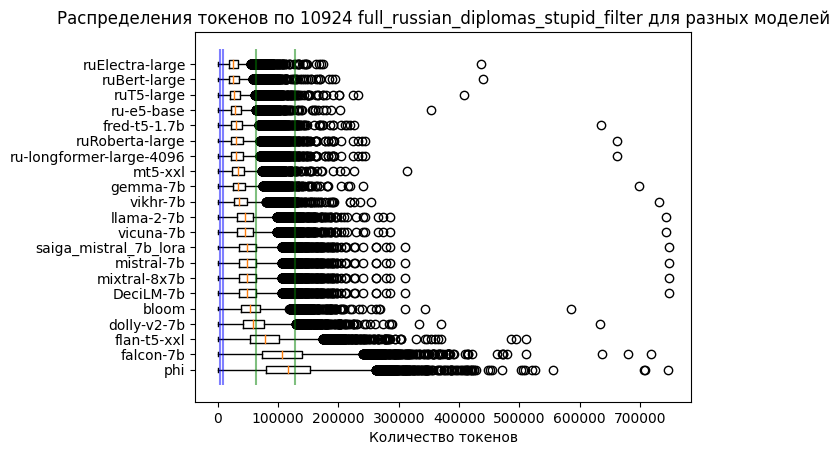

In [9]:
output_dir_path = ARTIFACTS_DIR_PATH.joinpath("tokens/full_russian_diplomas_stupid_filter/")
plot_tokens_distributions(output_dir_path, vlines_blue=[4000, 8000], vlines_green=[64000, 128000])

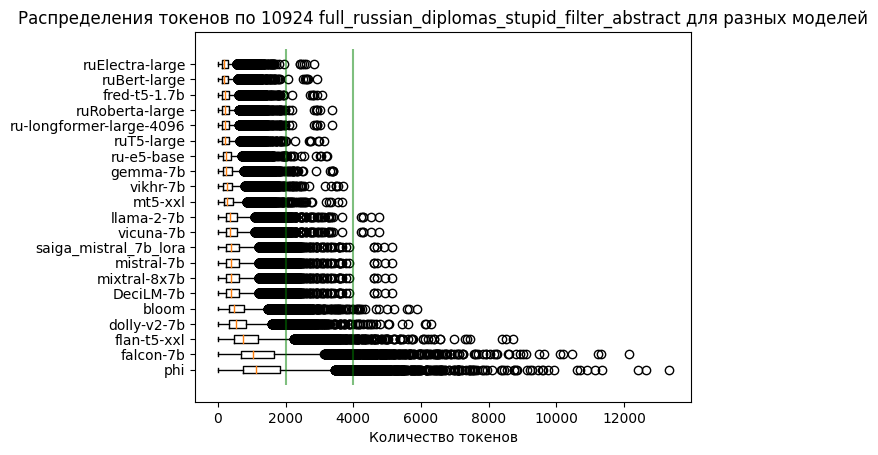

In [13]:
output_dir_path = ARTIFACTS_DIR_PATH.joinpath("tokens/full_russian_diplomas_stupid_filter_abstract/")
plot_tokens_distributions(output_dir_path, vlines_blue=[], vlines_green=[2000, 4000])